In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
file_path = 'C:/Users/sandra.campos/Descargas/jobs_in_data.csv'
jobs_data = pd.read_csv(file_path)

In [3]:
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
data_info = {
    "Column Name": jobs_data.columns,
    "Data Type": [jobs_data[col].dtype for col in jobs_data.columns],
    "Example Value": [jobs_data[col].iloc[0] if len(jobs_data[col]) > 0 else "N/A" for col in jobs_data.columns]
}

# Convert the analysis to a DataFrame for better visualization
variable_info = pd.DataFrame(data_info)

variable_info

Column Name Data Type         Example Value
0            work_year     int64                  2023
1            job_title    object  Data DevOps Engineer
2         job_category    object      Data Engineering
3      salary_currency    object                   EUR
4               salary     int64                 88000
5        salary_in_usd     int64                 95012
6   employee_residence    object               Germany
7     experience_level    object             Mid-level
8      employment_type    object             Full-time
9         work_setting    object                Hybrid
10    company_location    object               Germany
11        company_size    object                     L

In [5]:
# Columnas a excluir
exclude_columns = ['salary', 'salary_in_usd', 'work_year']

# Inicializar un diccionario para almacenar el contenido de las columnas
column_contents = {}

# Iterar por cada columna y excluir las seleccionadas
for column in jobs_data.columns:
    if column not in exclude_columns:
        # Almacenar valores únicos o el contenido de la columna
        column_contents[column] = jobs_data[column].unique()

# Convertir el contenido a un DataFrame para facilitar su visualización
column_contents_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in column_contents.items()]))

# Mostrar el contenido
column_contents_df

job_title                    job_category  \
0           Data DevOps Engineer                Data Engineering   
1                 Data Architect  Data Architecture and Modeling   
2                 Data Scientist       Data Science and Research   
3    Machine Learning Researcher         Machine Learning and AI   
4                  Data Engineer                   Data Analysis   
..                           ...                             ...   
120       Marketing Data Analyst                             NaN   
121      Data Analytics Engineer                             NaN   
122         Cloud Data Architect                             NaN   
123           Lead Data Engineer                             NaN   
124       Principal Data Analyst                             NaN   

    salary_currency employee_residence experience_level employment_type  \
0               EUR            Germany        Mid-level       Full-time   
1               USD      United States           Senior       Part-time   
2               GBP     United Kingdom        Executive        Contract   
3               CAD             Canada      Entry-level       Freelance   
4               AUD              Spain              NaN             NaN   
..              ...                ...              ...             ...   
120             NaN                NaN              NaN             NaN   
121             NaN                NaN              NaN             NaN   
122             NaN                NaN              NaN             NaN   
123             NaN                NaN              NaN             NaN   
124             NaN                NaN              NaN             NaN   

    work_setting company_location company_size  
0         Hybrid          Germany            L  
1      In-person    United States            M  
2         Remote   United Kingdom            S  
3            NaN           Canada          NaN  
4            NaN            Spain          NaN  
..           ...              ...          ...  
120          NaN              NaN          NaN  
121          NaN              NaN          NaN  
122          NaN              NaN          NaN  
123          NaN              NaN          NaN  
124          NaN              NaN          NaN  

[125 rows x 9 columns]

In [6]:
jobs_data.head()

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

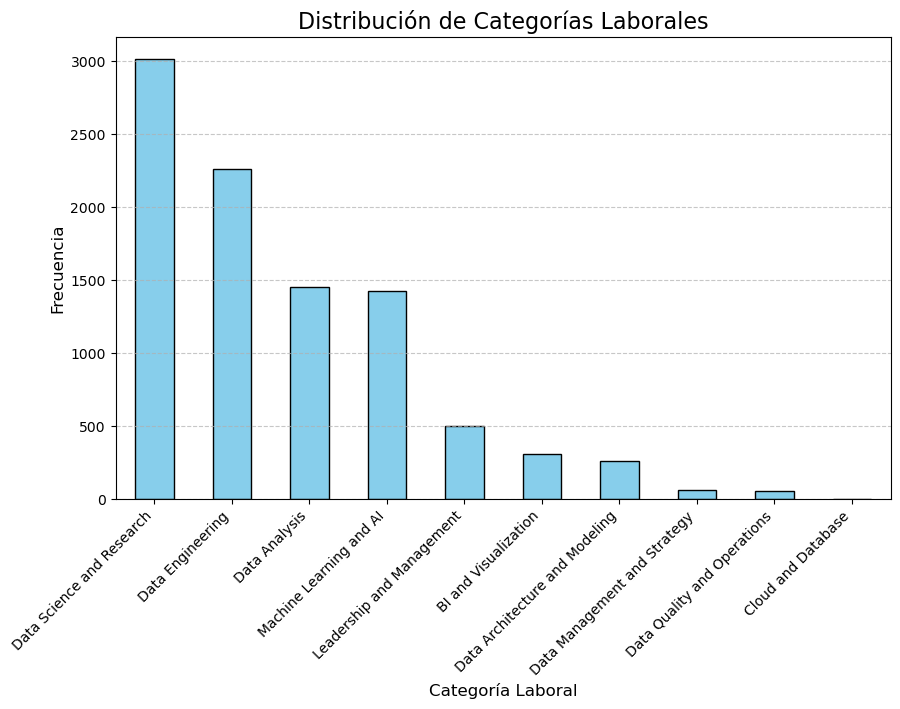

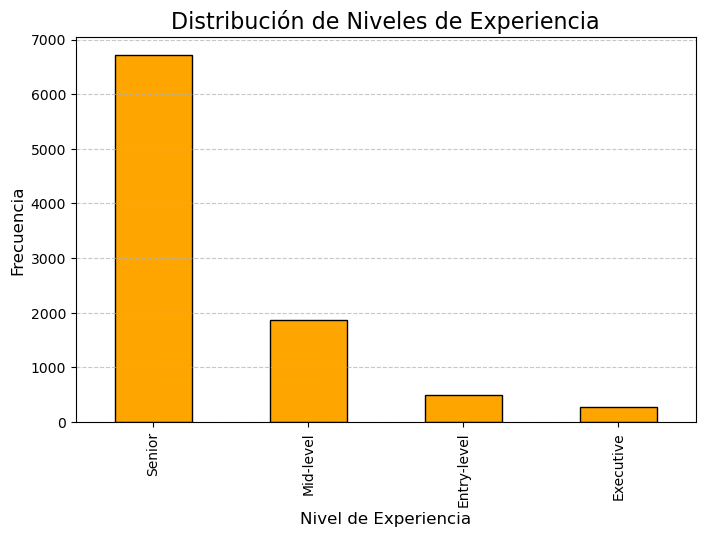

In [7]:
# Distribución de la categoría laboral
plt.figure(figsize=(10, 6))
jobs_data['job_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de Categorías Laborales", fontsize=16)
plt.xlabel("Categoría Laboral", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribución de niveles de experiencia
plt.figure(figsize=(8, 5))
jobs_data['experience_level'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Distribución de Niveles de Experiencia", fontsize=16)
plt.xlabel("Nivel de Experiencia", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
# Estadísticas descriptivas de las variables numéricas
print(jobs_data[['salary', 'salary_in_usd']].describe().round(2))

          salary  salary_in_usd
count    9355.00        9355.00
mean   149927.98      150299.50
std     63608.84       63177.37
min     14000.00       15000.00
25%    105200.00      105700.00
50%    143860.00      143000.00
75%    187000.00      186723.00
max    450000.00      450000.00


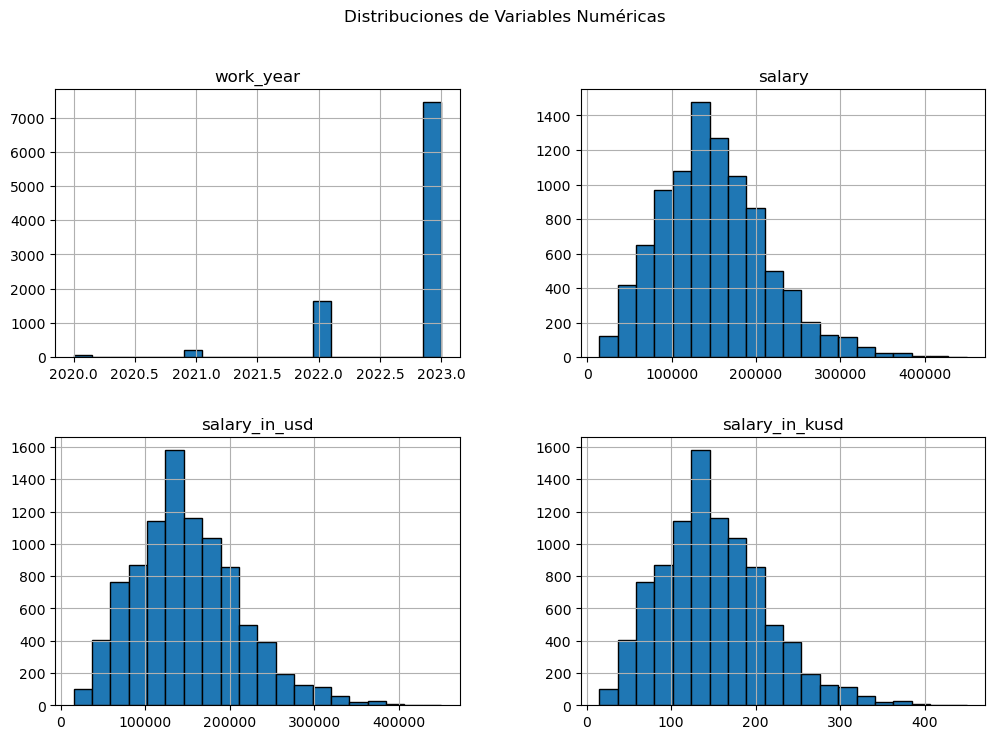

In [34]:
# Histogramas para variables numéricas
numeric_columns.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distribuciones de Variables Numéricas")
plt.show()


In [35]:
# Distribuciones de variables categóricas
for col in jobs_data.select_dtypes(include=['object']).columns:
    print(f"Distribución de {col}:")
    print(jobs_data[col].value_counts())
    print("\n")


Distribución de job_title:
job_title
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: count, Length: 125, dtype: int64


Distribución de job_category:
job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64


Distribución de salary_currency:

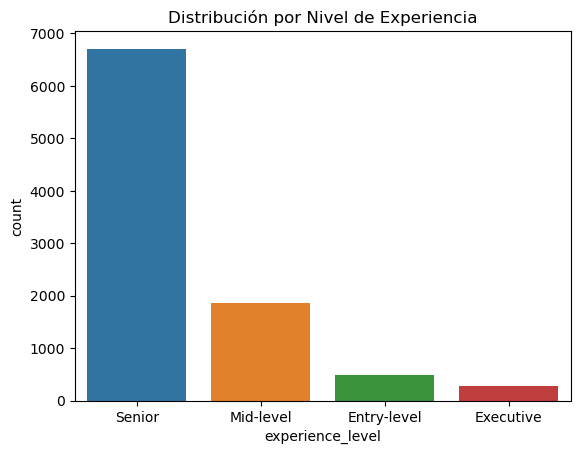

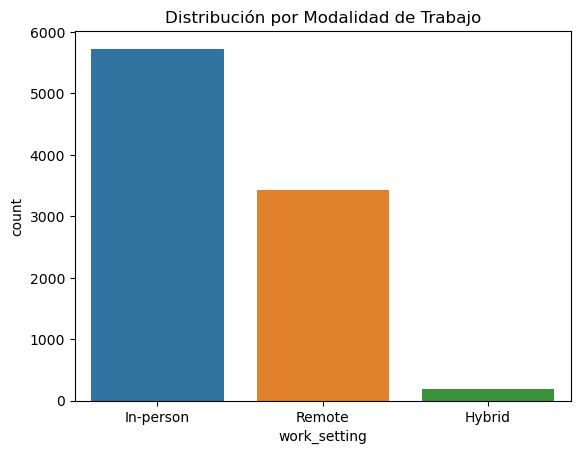

In [36]:
# Gráfico de barras para experiencia
sns.countplot(data=jobs_data, x='experience_level', order=jobs_data['experience_level'].value_counts().index)
plt.title("Distribución por Nivel de Experiencia")
plt.show()

# Gráfico de barras para modalidad de trabajo
sns.countplot(data=jobs_data, x='work_setting', order=jobs_data['work_setting'].value_counts().index)
plt.title("Distribución por Modalidad de Trabajo")
plt.show()


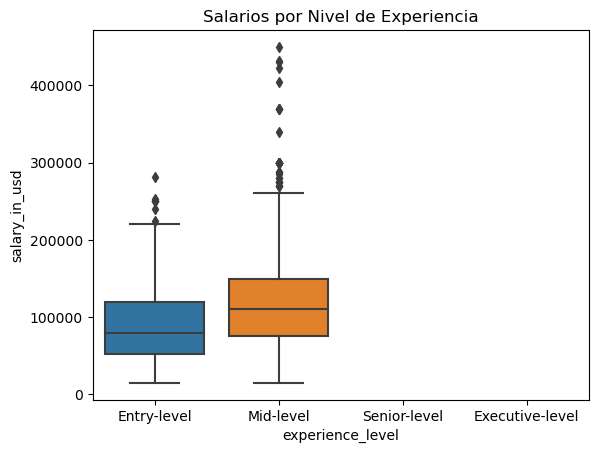

In [37]:
sns.boxplot(data=jobs_data, x='experience_level', y='salary_in_usd', order=['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
plt.title("Salarios por Nivel de Experiencia")
plt.show()


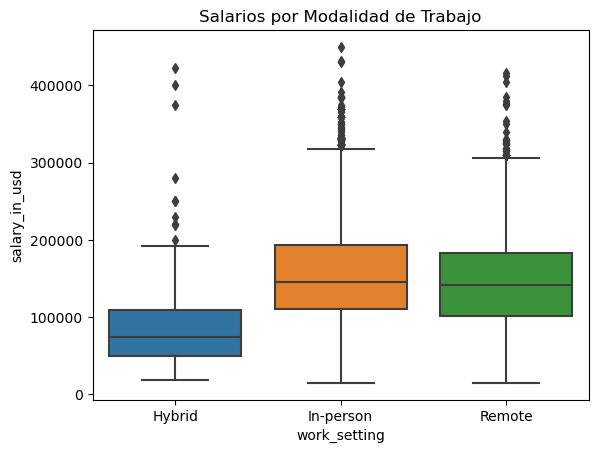

In [38]:
sns.boxplot(data=jobs_data, x='work_setting', y='salary_in_usd')
plt.title("Salarios por Modalidad de Trabajo")
plt.show()


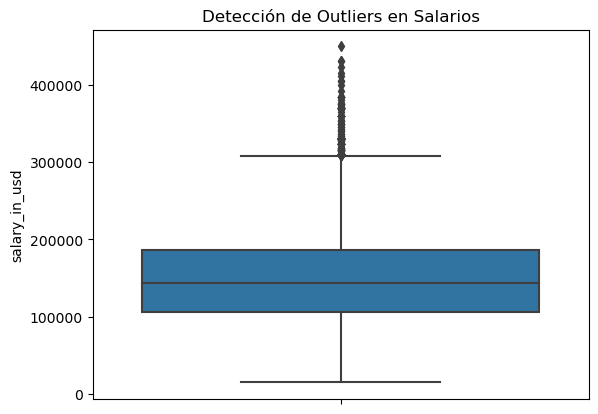

In [41]:
# Detectar outliers en salario
sns.boxplot(data=jobs_data, y='salary_in_usd')
plt.title("Detección de Outliers en Salarios")
plt.show()



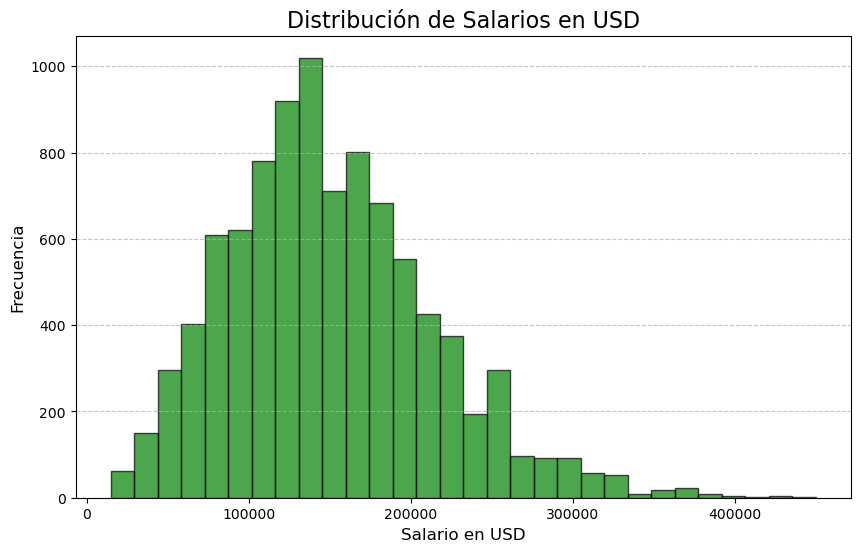

In [9]:
# Histograma de salarios en USD
plt.figure(figsize=(10, 6))
plt.hist(jobs_data['salary_in_usd'], bins=30, edgecolor='black', color='green', alpha=0.7)
plt.title("Distribución de Salarios en USD", fontsize=16)
plt.xlabel("Salario en USD", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


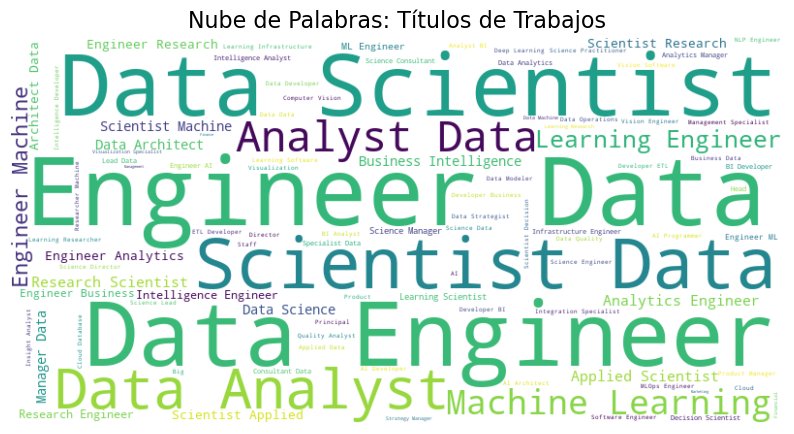

In [10]:
# Generar una nube de palabras para títulos de trabajos
text = ' '.join(jobs_data['job_title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras: Títulos de Trabajos", fontsize=16)
plt.show()


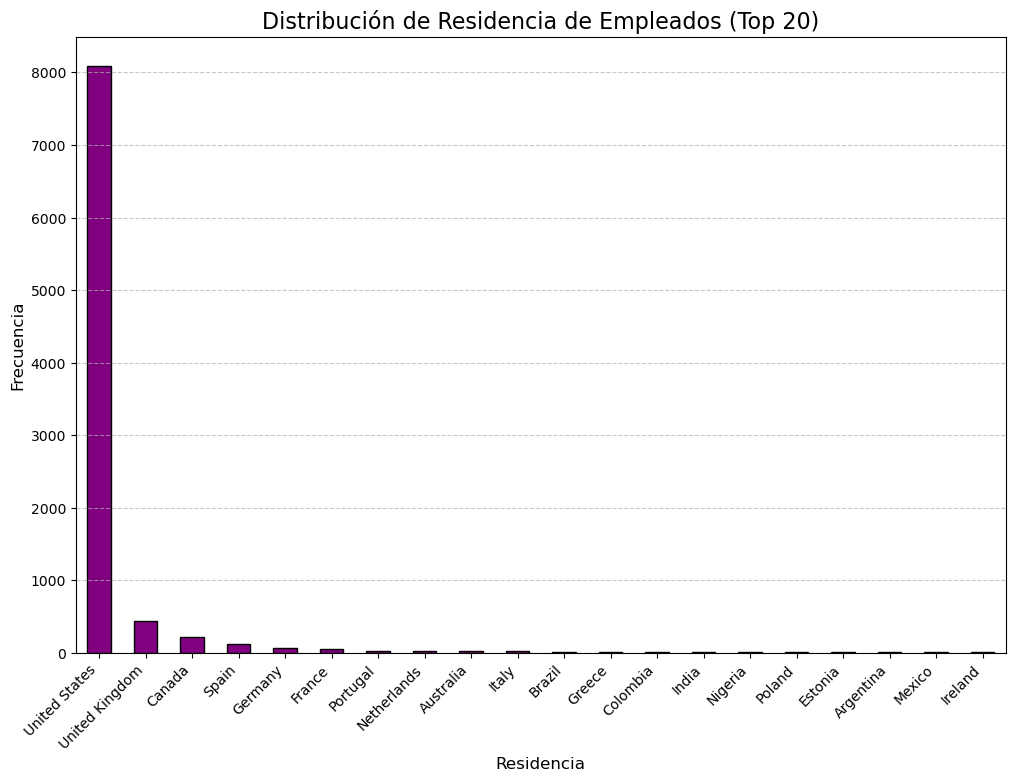

In [11]:
# Distribución de residencia de empleados
plt.figure(figsize=(12, 8))
jobs_data['employee_residence'].value_counts().head(20).plot(kind='bar', color='purple', edgecolor='black')
plt.title("Distribución de Residencia de Empleados (Top 20)", fontsize=16)
plt.xlabel("Residencia", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
# Frecuencia de variables categóricas
categorical_columns = ['job_category', 'experience_level', 'employment_type', 'work_setting', 'company_size']
for column in categorical_columns:
    print(f"Frecuencia de {column}:")
    print(jobs_data[column].value_counts())
    print("\n")


Frecuencia de job_category:
job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64


Frecuencia de experience_level:
experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64


Frecuencia de employment_type:
employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64


Frecuencia de work_setting:
work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64


Frecuencia de company_size:
company_size
M    8448
L     748
S     159
Name: count, dtype: int64




Número de outliers detectados en 'salary_in_usd': 158


C:\Users\sandra.campos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


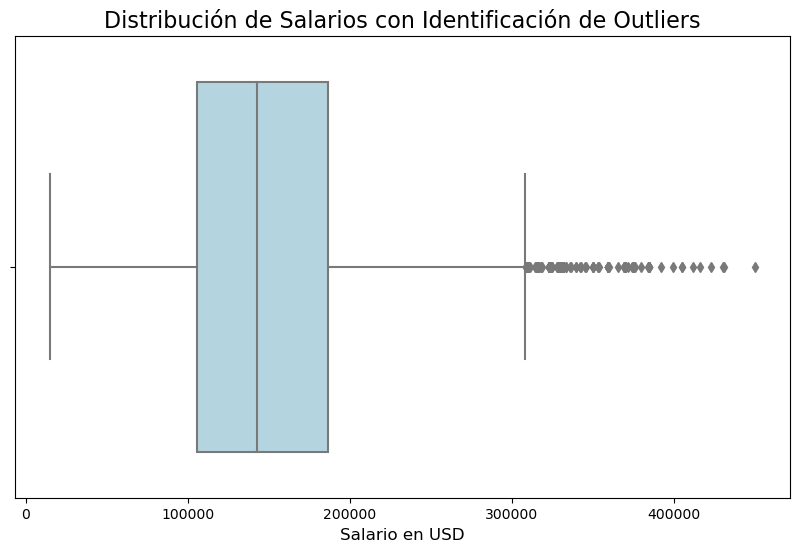

In [13]:
# Identificar outliers en los salarios (usando el rango intercuartílico)
q1 = jobs_data['salary_in_usd'].quantile(0.25)
q3 = jobs_data['salary_in_usd'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = jobs_data[(jobs_data['salary_in_usd'] < lower_bound) | (jobs_data['salary_in_usd'] > upper_bound)]
print(f"Número de outliers detectados en 'salary_in_usd': {len(outliers)}")

# Visualización de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(jobs_data['salary_in_usd'], color='lightblue')
plt.title("Distribución de Salarios con Identificación de Outliers", fontsize=16)
plt.xlabel("Salario en USD", fontsize=12)
plt.show()


In [14]:
# Relación entre categoría laboral y títulos más comunes
top_job_titles = jobs_data.groupby('job_category')['job_title'].value_counts().groupby(level=0).nlargest(3).reset_index(level=0, drop=True)
print("Top 3 Títulos de Trabajo por Categoría:")
print(top_job_titles)


Top 3 Títulos de Trabajo por Categoría:
job_category                    job_title                     
BI and Visualization            Business Intelligence Engineer     144
                                Business Intelligence Analyst       54
                                BI Developer                        52
Cloud and Database              Cloud Database Engineer              5
Data Analysis                   Data Analyst                      1388
                                Business Data Analyst               18
                                BI Data Analyst                     16
Data Architecture and Modeling  Data Architect                     213
                                Data Modeler                        22
                                Data Strategist                     18
Data Engineering                Data Engineer                     2195
                                ETL Developer                       18
                                Data Infrastr

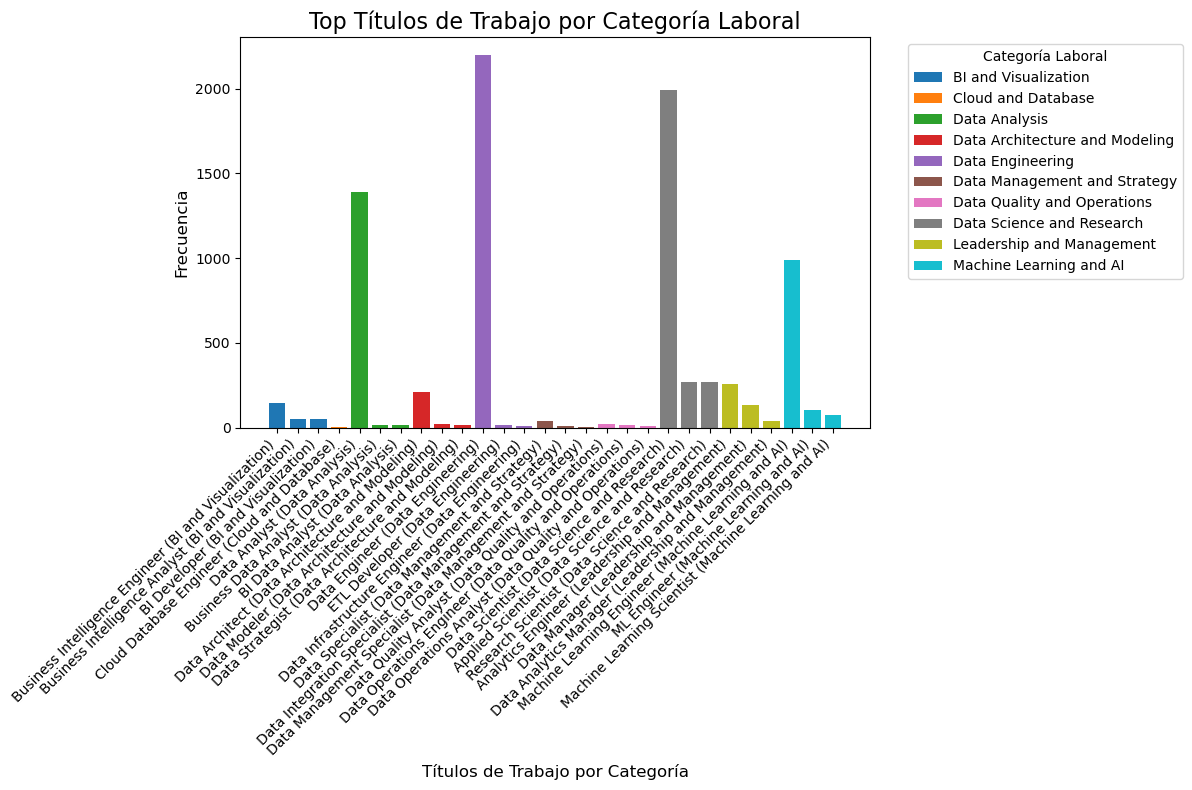

In [15]:
# Agrupar el dataset por categoría laboral y título de trabajo
top_titles_per_category = (
    jobs_data.groupby(['job_category', 'job_title'])
    .size()  # Contar la frecuencia de cada combinación
    .groupby(level=0, group_keys=False)
    .nlargest(3)  # Seleccionar los 3 títulos más comunes por categoría
)

# Transformar el resultado a un DataFrame
top_titles_df = top_titles_per_category.reset_index(name='count')

# Crear una visualización separada por categorías
plt.figure(figsize=(12, 8))
categories = top_titles_df['job_category'].unique()

for category in categories:
    subset = top_titles_df[top_titles_df['job_category'] == category]
    plt.bar(
        subset['job_title'] + f" ({category})",  # Combinar título con categoría
        subset['count'],
        label=category
    )

# Mejorar legibilidad
plt.title("Top Títulos de Trabajo por Categoría Laboral", fontsize=16)
plt.xlabel("Títulos de Trabajo por Categoría", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Categoría Laboral", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [16]:
# Países con mayor número de empleados
top_countries = jobs_data['employee_residence'].value_counts().head(10)
print("Países con mayor número de empleados:")
print(top_countries)

Países con mayor número de empleados:
employee_residence
United States     8086
United Kingdom     442
Canada             224
Spain              117
Germany             66
France              54
Portugal            26
Netherlands         21
Australia           21
Italy               20
Name: count, dtype: int64


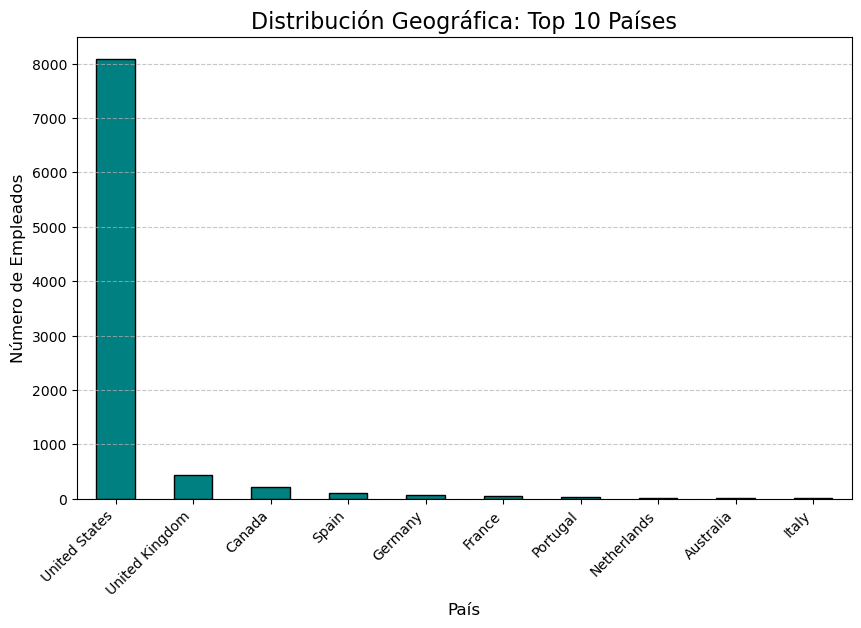

In [17]:
# Visualización
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Distribución Geográfica: Top 10 Países", fontsize=16)
plt.xlabel("País", fontsize=12)
plt.ylabel("Número de Empleados", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
# Salario promedio por año
salary_by_year = jobs_data.groupby('work_year')['salary_in_usd'].mean().round(2)
print("Salario Promedio por Año:")
salary_by_year


Salario Promedio por Año:


work_year
2020    105878.86
2021    106483.64
2022    135467.50
2023    155132.59
Name: salary_in_usd, dtype: float64

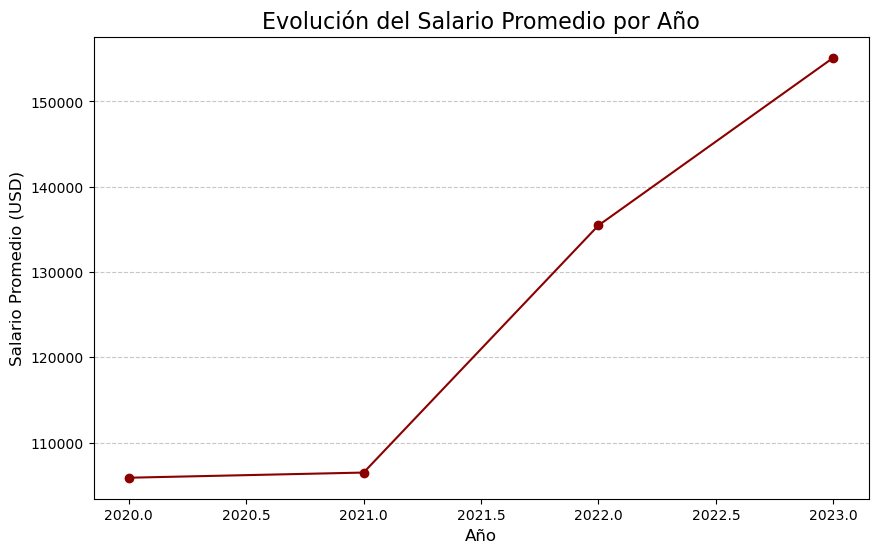

In [19]:
# Visualización
plt.figure(figsize=(10, 6))
salary_by_year.plot(kind='line', marker='o', color='darkred')
plt.title("Evolución del Salario Promedio por Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Salario Promedio (USD)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
# Explorar el dataset
print("Columnas del dataset:", jobs_data.columns)
print("\nInformación general:")
print(jobs_data.info())
print("\nResumen estadístico:")
print(jobs_data.describe(include='all'))

Columnas del dataset: Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    935

ANALISIS INICIAL

In [21]:
print("\nTop 10 roles más comunes:")
print(jobs_data['job_title'].value_counts().head(10))



Top 10 roles más comunes:
job_title
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
Research Scientist                 269
Analytics Engineer                 256
Data Architect                     213
Business Intelligence Engineer     144
Research Engineer                  144
Name: count, dtype: int64


In [22]:
print("\nSalarios promedio por país:")
print(jobs_data.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10))



Salarios promedio por país:
employee_residence
Qatar            300000.000000
Malaysia         200000.000000
Puerto Rico      166000.000000
United States    158586.128741
Canada           144743.013393
Australia        138639.047619
Japan            135500.000000
Saudi Arabia     134999.000000
China            125404.000000
New Zealand      125000.000000
Name: salary_in_usd, dtype: float64


In [23]:
print("\nModalidades de trabajo más comunes:")
print(jobs_data['work_setting'].value_counts())



Modalidades de trabajo más comunes:
work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64


Preparar Datos para Visualización

In [24]:
jobs_data['salary_in_kusd'] = jobs_data['salary_in_usd'] / 1000


In [25]:
jobs_data['company_size'] = jobs_data['company_size'].map({'S': 'Small', 'M': 'Medium', 'L': 'Large'})


Visualizaciones Iniciales

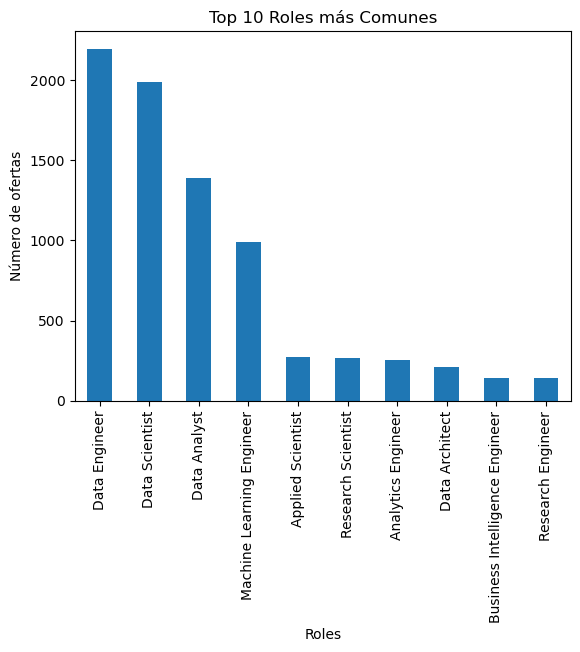

In [26]:
import matplotlib.pyplot as plt

jobs_data['job_title'].value_counts().head(10).plot(kind='bar', title='Top 10 Roles más Comunes')
plt.ylabel('Número de ofertas')
plt.xlabel('Roles')
plt.show()


In [28]:
import plotly.express as px


In [29]:
fig = px.box(jobs_data, x='work_setting', y='salary_in_usd', color='work_setting',
             title='Distribución de Salarios por Modalidad de Trabajo',
             labels={'work_setting': 'Modalidad de Trabajo', 'salary_in_usd': 'Salario en USD'})
fig.show()


In [30]:
# Verificar los valores únicos en la columna de residencia
print(jobs_data['employee_residence'].unique())


['Germany' 'United States' 'United Kingdom' 'Canada' 'Spain' 'Ireland'
 'South Africa' 'Poland' 'France' 'Czech Republic' 'Netherlands'
 'Pakistan' 'Ukraine' 'Lithuania' 'Portugal' 'Australia' 'Uganda'
 'Colombia' 'Italy' 'Slovenia' 'Romania' 'Greece' 'India' 'Latvia'
 'Mauritius' 'Armenia' 'Croatia' 'Thailand' 'South Korea' 'Estonia'
 'Turkey' 'Philippines' 'Brazil' 'Qatar' 'Russia' 'Kenya' 'Tunisia'
 'Ghana' 'Belgium' 'Switzerland' 'Andorra' 'Ecuador' 'Peru' 'Mexico'
 'Moldova' 'Nigeria' 'Saudi Arabia' 'Argentina' 'Egypt' 'Uzbekistan'
 'Georgia' 'Central African Republic' 'Finland' 'Austria' 'Singapore'
 'Sweden' 'Kuwait' 'Cyprus' 'Bosnia and Herzegovina' 'Iran'
 'American Samoa' 'China' 'Costa Rica' 'Chile' 'Puerto Rico' 'Denmark'
 'Bolivia' 'Dominican Republic' 'Indonesia' 'United Arab Emirates'
 'Malaysia' 'Japan' 'Honduras' 'Algeria' 'Vietnam' 'Iraq' 'Bulgaria'
 'Jersey' 'Serbia' 'New Zealand' 'Hong Kong' 'Luxembourg' 'Malta']


In [44]:
fig = px.box(
    jobs_data,
    x="work_setting",
    y="salary_in_usd",
    color="work_setting",
    title="Distribución de Salarios por Modalidad de Trabajo",
    labels={"work_setting": "Modalidad de Trabajo", "salary_in_usd": "Salario (USD)"}
)
fig.show()

In [45]:
fig = px.bar(
    jobs_data.groupby('job_category')['salary_in_usd'].mean().reset_index(),
    x="job_category",
    y="salary_in_usd",
    color="job_category",
    title="Salarios Promedio por Categoría de Empleo",
    labels={"job_category": "Categoría de Empleo", "salary_in_usd": "Salario Promedio (USD)"},
    text="salary_in_usd"
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [47]:
from dash import Dash, html, dcc

In [48]:
app = Dash(__name__)

# Visualización interactiva
fig1 = px.bar(
    jobs_data.groupby('experience_level')['salary_in_usd'].mean().reset_index(),
    x="experience_level",
    y="salary_in_usd",
    color="experience_level",
    title="Salarios Promedio por Nivel de Experiencia"
)

fig2 = px.scatter(
    jobs_data,
    x="salary_in_usd",
    y="work_year",
    color="experience_level",
    title="Relación entre Años y Salarios"
)

app.layout = html.Div([
    html.H1("Dashboard Interactivo - Análisis Salarial"),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2)
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
#!pip install pycountry

In [49]:
import pycountry

In [50]:


def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Convertir nombres de países a códigos ISO-3
jobs_data['iso_code'] = jobs_data['employee_residence'].apply(get_iso3)

# Verificar si hay valores nulos después de la conversión
print(jobs_data['iso_code'].isnull().sum())


13


In [51]:
import plotly.express as px

fig = px.choropleth(jobs_data, 
                    locations='iso_code',  # Usar los códigos ISO-3
                    locationmode='ISO-3', 
                    color='salary_in_usd',
                    title='Salario Promedio por País',
                    labels={'salary_in_usd': 'Salario Promedio (USD)'},
                    color_continuous_scale='Viridis')  # Escala de color opcional

fig.show()


In [52]:
import plotly.express as px

# Promedio de salario por nivel de experiencia
avg_salary_experience = jobs_data.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Gráfico interactivo
fig = px.bar(avg_salary_experience, 
             x='experience_level', 
             y='salary_in_usd', 
             color='experience_level',
             title='Promedio Salarial por Nivel de Experiencia',
             labels={'experience_level': 'Nivel de Experiencia', 'salary_in_usd': 'Salario Promedio (USD)'},
             text='salary_in_usd')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


In [53]:
avg_salary_size = jobs_data.groupby('company_size')['salary_in_usd'].mean().reset_index()

fig = px.bar(avg_salary_size, 
             x='company_size', 
             y='salary_in_usd', 
             color='company_size',
             title='Promedio Salarial por Tamaño de Empresa',
             labels={'company_size': 'Tamaño de Empresa', 'salary_in_usd': 'Salario Promedio (USD)'})
fig.show()


In [54]:
avg_salary_year = jobs_data.groupby('work_year')['salary_in_usd'].mean().reset_index()

fig = px.line(avg_salary_year, 
              x='work_year', 
              y='salary_in_usd',
              title='Evolución de Salarios Promedio por Año',
              labels={'work_year': 'Año', 'salary_in_usd': 'Salario Promedio (USD)'})
fig.show()


In [55]:
top_countries = jobs_data.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(top_countries, 
             x='employee_residence', 
             y='salary_in_usd', 
             color='employee_residence',
             title='Top 10 Países con los Mejores Salarios Promedio',
             labels={'employee_residence': 'País', 'salary_in_usd': 'Salario Promedio (USD)'},
             text='salary_in_usd')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


In [ ]:
#!pip install dash

In [56]:
from dash import Dash, html, dcc

In [57]:
app = Dash(__name__)

# Visualizaciones
fig1 = px.bar(avg_salary_experience, x='experience_level', y='salary_in_usd', title='Promedio Salarial por Nivel de Experiencia')
fig2 = px.bar(top_countries, x='employee_residence', y='salary_in_usd', title='Top 10 Países con Mejores Salarios Promedio')

app.layout = html.Div([
    html.H1('Dashboard Interactivo - Análisis Salarial'),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [58]:
fig = px.violin(jobs_data, 
                x='experience_level', 
                y='salary_in_usd', 
                color='experience_level',
                box=True, 
                title='Desigualdad Salarial por Nivel de Experiencia',
                labels={'experience_level': 'Nivel de Experiencia', 'salary_in_usd': 'Salario en USD'})
fig.show()


In [59]:
# Agrupar por nivel de experiencia y modalidad
experience_work = jobs_data.groupby(['experience_level', 'work_setting'])['salary_in_usd'].mean().reset_index()

# Gráfico interactivo
fig = px.bar(experience_work, 
             x='experience_level', 
             y='salary_in_usd', 
             color='work_setting',
             barmode='group',
             title='Salarios por Nivel de Experiencia y Modalidad de Trabajo',
             labels={'experience_level': 'Nivel de Experiencia', 'salary_in_usd': 'Salario Promedio (USD)', 'work_setting': 'Modalidad de Trabajo'})

fig.show()


In [60]:
# Agrupar por año y nivel de experiencia
salary_time_experience = jobs_data.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Gráfico de líneas interactivo
fig = px.line(salary_time_experience, 
              x='work_year', 
              y='salary_in_usd', 
              color='experience_level',
              title='Evolución Salarial por Año y Nivel de Experiencia',
              labels={'work_year': 'Año', 'salary_in_usd': 'Salario Promedio (USD)', 'experience_level': 'Nivel de Experiencia'})

fig.show()


In [61]:
fig = px.treemap(jobs_data, 
                 path=['employee_residence', 'job_title'], 
                 values='salary_in_usd',
                 title='Distribución de Roles por País',
                 labels={'employee_residence': 'País', 'job_title': 'Título del Trabajo', 'salary_in_usd': 'Salario en USD'})

fig.show()


In [62]:
fig = px.box(jobs_data, 
             x='job_category', 
             y='salary_in_usd', 
             color='job_category',
             title='Distribución de Salarios por Categoría Laboral',
             labels={'job_category': 'Categoría Laboral', 'salary_in_usd': 'Salario en USD'})

fig.show()


In [63]:
fig = px.violin(jobs_data, 
                x='employee_residence', 
                y='salary_in_usd', 
                color='employee_residence',
                box=True, 
                title='Desigualdad Salarial por País',
                labels={'employee_residence': 'País', 'salary_in_usd': 'Salario en USD'})

fig.update_traces(spanmode='soft')
fig.show()


In [64]:
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [65]:
# Escalar los datos
scaler = MinMaxScaler()
jobs_data_scaled = scaler.fit_transform(jobs_data[['salary_in_usd']])

# Clustering con KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
jobs_data['cluster'] = kmeans.fit_predict(jobs_data_scaled)

# Visualización
fig = px.scatter(jobs_data, 
                 x='salary_in_usd', 
                 y='cluster', 
                 color='cluster',
                 title='Clusterización de Salarios y Roles',
                 labels={'salary_in_usd': 'Salario en USD', 'cluster': 'Cluster'})

fig.show()
